# Feature Selection (Diatom Biomass)

## Importing

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xskillscore as xs

import os
import lzma
import dill

import cmocean as cm
import salishsea_tools.viz_tools as sa_vi



## Figure R (Biomass)

In [2]:
def figure_r_b(names, inputs_names2, boxnames, r_b, coef_max, name2):

    if name2 == 'DB':
        labels = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
    else:
        labels = ['(k)','(l)','(m)','(n)','(o)','(p)','(q)','(r)','(s)']

    k,l = 0,0
    fig, ax = plt.subplots(2, 5, figsize=(17, 7.5), layout='constrained', subplot_kw={'projection': 'polar'})

    for i in range (0, len(boxnames)):

        theta = np.linspace(0, 2*np.pi, 9)
        values = np.append(r_b[i,:], r_b[i,:][0])

        ax[k,l].plot(theta, values,  marker='o')
        ax[k,l].plot(theta[0], values[0],  marker='o', ls = '--')
        ax[k,l].plot(np.linspace(0, 2*np.pi, 100), np.full(100, values[0]), ls = '--', color = 'tab:orange')
        
        ax[k,l].annotate(labels[i], (0.02, 1.2), xycoords='axes fraction', fontsize=14)

        ax[k,l].set_theta_zero_location('N')
        ax[k,l].set_rmax(np.max(values)+0.05)
        ax[k,l].set_rmin(np.min(values)-0.05)
        ax[k,l].set_rticks(np.round(np.linspace(np.round(np.min(values),1), np.round(np.max(values),1), 3), 2))

        ax[k,l].set_rlabel_position(230) # The text
        ax[k,l].tick_params(pad = 7)
        ax[k,l].set_xticks(theta[:-1], names[i])
        ax[k,l].set_title(boxnames[i], x=0.50, y=1.15, fontsize=12)
        ax[k,l].xaxis.set_tick_params(labelsize=11)
        ax[k,l].yaxis.set_tick_params(labelsize=11)

        l=l+1
        if l==5:
            l=0
            k=k+1
            
    fig.legend(['variations', 'proposed'], fontsize=11)
    fig.suptitle('Importances of Input Features on ' + name2 + ' (R Evaluation no Seasonality)', fontsize=15)

    ax[k,l].remove()
    ax[k,l] = fig.add_subplot(2,5,10)

    if name2 == 'DB':
        ax[k,l].annotate('(j)', (-0.1, 1.1), xycoords='axes fraction', fontsize=14)
    else:
        ax[k,l].annotate('(t)', (-0.1, 1.1), xycoords='axes fraction', fontsize=14)

    h = plt.imshow(coef_max, cmap = cm.cm.ice, aspect='auto', vmin= coef_max.min(), vmax=coef_max.max())
    plt.title('Importance Coefficients \n (Maximum Absolute Value)', fontsize=12)
    plt.xlabel('Input features', fontsize=11)
    plt.ylabel('Sub-regions', fontsize=11)
    cbar = plt.colorbar(h, pad=-0.05)
    cbar.ax.tick_params(labelsize=11)

    plt.ylim(plt.ylim()[::-1])
    plt.xticks(range(len(inputs_names2)), labels=inputs_names2, rotation=30, fontsize=11)
    plt.yticks(range(len(boxnames)), labels=boxnames, rotation=45, fontsize=11)

    plt.show()


## Figure R (Production Rates)

In [3]:
def figure_r_pr(names, boxnames, r_s, r_b, r_importance, name2):

    if name2 == 'DPR':
        labels = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
    else:
        labels = ['(k)','(l)','(m)','(n)','(o)','(p)','(q)','(r)','(s)']

    k,l = 0,0
    fig, ax = plt.subplots(2, 5, figsize=(17, 7.5), layout='constrained', subplot_kw={'projection': 'polar'})

    for i in range (0, len(boxnames)):

        theta = np.arange(len(names) + 1) / float(len(names)) * 2 * np.pi

        values = np.append(r_s[:,i], r_s[:,i][0])
        values2 = np.append(r_b[:,i], r_b[:,i][0])

        ax[k,l].plot(theta, values, marker='o', label ='Single')
        ax[k,l].plot(theta, values2, marker='o', label = 'Independent')
        ax[k,l].plot(theta[0], values[0], marker='o', label ='Single', ls = '--', color='tab:green')
        ax[k,l].plot(np.linspace(0, 2*np.pi, 100), np.full(100, values[0]), ls = '--', marker = 'o', markersize=0, color='tab:green')

        ax[k,l].annotate(labels[i], (0.02, 1.2), xycoords='axes fraction', fontsize=14)

        ax[k,l].set_theta_zero_location('N')
        ax[k,l].set_rmax(np.maximum(np.max(values)+0.05, np.max(values2)+0.05))
        ax[k,l].set_rmin(np.minimum(np.min(values)-0.05, np.min(values2)-0.05)) 
        ax[k,l].set_rticks(np.round(np.linspace(np.round(np.minimum(np.min(values)-0.05, np.min(values2)-0.05),1), np.round(np.maximum(np.max(values)+0.05, np.max(values2)+0.05),1), 3), 2))

        ax[k,l].set_rlabel_position(230)
        ax[k,l].tick_params(pad = 7)
        ax[k,l].set_xticks(theta[:-1], names)
        ax[k,l].set_title(boxnames[i], x=0.50, y=1.15, fontsize=12)
        ax[k,l].xaxis.set_tick_params(labelsize=11)
        ax[k,l].yaxis.set_tick_params(labelsize=11)

        l=l+1
        if l==5:
            l=0
            k=k+1

    fig.legend(['single', 'independent', 'proposed'], ncols=3, fontsize=11)
    fig.suptitle('Importances of Input Features on ' + name2 + ' (R Evaluation no Seasonality)', fontsize=15)

    ax[k,l].remove()
    ax[k,l] = fig.add_subplot(2,5,10)

    if name2 == 'DPR':
        ax[k,l].annotate('(j)', (-0.1, 1.1), xycoords='axes fraction', fontsize=14)
    else:
        ax[k,l].annotate('(t)', (-0.1, 1.1), xycoords='axes fraction', fontsize=14)

    r_importance.plot.bar(ax=ax[k,l])

    ax[k, l].set_title('Input Feature Importance \n (Single)', fontsize=12)
    ax[k,l].set_xlabel('Input Features', fontsize=11)
    ax[k,l].set_ylabel('Mean R decrease', fontsize=11)
    ax[k,l].xaxis.set_tick_params(labelsize=11)
    ax[k,l].yaxis.set_tick_params(labelsize=11)

    plt.show()


## Figure RMSE (Biomass)

In [4]:
def figure_rms_b(names, inputs_names2, boxnames, rms_b, coef_max, name2):

    if name2 == 'DB':
        labels = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
    else:
        labels = ['(k)','(l)','(m)','(n)','(o)','(p)','(q)','(r)','(s)']

    k,l = 0,0
    fig, ax = plt.subplots(2, 5, figsize=(17, 7.5), layout='constrained', subplot_kw={'projection': 'polar'})

    for i in range (0, len(boxnames)):

        theta = np.linspace(0, 2*np.pi, 9)
        values = np.append(rms_b[i,:], rms_b[i,:][0])

        ax[k,l].plot(theta, values, marker='o')
        ax[k,l].plot(theta[0], values[0],  marker='o', ls = '--')
        ax[k,l].plot(np.linspace(0, 2*np.pi, 100), np.full(100, values[0]), ls = '--', color = 'tab:orange')

        ax[k,l].annotate(labels[i], (0.02, 1.2), xycoords='axes fraction', fontsize=14)

        ax[k,l].set_theta_zero_location('N')
        ax[k,l].set_rmax(np.max(values)+1)
        ax[k,l].set_rmin(5)
        ax[k,l].set_rticks((10,15,20))
        if i == 6:
            ax[k,l].set_rticks((10,15,20))
            

        ax[k,l].set_rlabel_position(230) # The text
        ax[k,l].tick_params(pad = 7)
        ax[k,l].set_xticks(theta[:-1], names[i])
        ax[k,l].set_title(boxnames[i], x=0.50, y=1.15, fontsize=12)
        ax[k,l].xaxis.set_tick_params(labelsize=11)
        ax[k,l].yaxis.set_tick_params(labelsize=11)

        l=l+1
        if l==5:
            l=0
            k=k+1
            
    fig.legend(['variations', 'proposed'], fontsize=11)
    fig.suptitle('Importances of Input Features on ' + name2 + ' (RMSE Evaluation)', fontsize=15)

    ax[k,l].remove()
    ax[k,l] = fig.add_subplot(2,5,10)

    if name2 == 'DB':
        ax[k,l].annotate('(j)', (-0.1, 1.1), xycoords='axes fraction', fontsize=14)
    else:
        ax[k,l].annotate('(t)', (-0.1, 1.1), xycoords='axes fraction', fontsize=14)

    h = plt.imshow(coef_max, cmap = cm.cm.ice, aspect='auto', vmin= coef_max.min(), vmax=coef_max.max())
    plt.title('Importance Coefficients \n (Maximum Absolute Value)', fontsize=12)
    plt.xlabel('Input features', fontsize=11)
    plt.ylabel('Sub-regions', fontsize=11)
    cbar = plt.colorbar(h, pad = -0.05)
    cbar.ax.tick_params(labelsize=11)

    plt.ylim(plt.ylim()[::-1])
    plt.xticks(range(len(inputs_names2)), labels=inputs_names2, rotation=30, fontsize=11)
    plt.yticks(range(len(boxnames)), labels=boxnames, rotation=45, fontsize=11)

    plt.show()


## Figure RMSE (Production Rates)

In [5]:
def figure_rms_pr(names, boxnames, rms_s, rms_b, rms_importance, name2):

    if name2 == 'DPR':
        labels = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
    else:
        labels = ['(k)','(l)','(m)','(n)','(o)','(p)','(q)','(r)','(s)']

    k,l = 0,0
    fig, ax = plt.subplots(2, 5, figsize=(17, 7.5), layout='constrained', subplot_kw={'projection': 'polar'})

    for i in range (0, len(boxnames)):

        theta = np.arange(len(names) + 1) / float(len(names)) * 2 * np.pi

        values = np.append(rms_s[:,i], rms_s[:,i][0])
        values2 = np.append(rms_b[:,i], rms_b[:,i][0])

        ax[k,l].plot(theta, values, marker='o', label ='Single')
        ax[k,l].plot(theta, values2, marker='o', label = 'Independent')
        ax[k,l].plot(theta[0], values[0], marker='o', label ='Single', ls = '--', color='tab:green')
        ax[k,l].plot(np.linspace(0, 2*np.pi, 100), np.full(100, values[0]), ls = '--', marker = 'o', markersize=0, color='tab:green')

        ax[k,l].annotate(labels[i], (0.02, 1.2), xycoords='axes fraction', fontsize=14)

        ax[k,l].set_theta_zero_location('N')
        # ax[k,l].set_rmax(np.max(values)+1)
        # ax[k,l].set_rmin(5)
        ax[k,l].set_rticks((10,20,30))
        
        ax[k,l].set_rlabel_position(230)
        ax[k,l].tick_params(pad = 7)
        ax[k,l].set_xticks(theta[:-1], names)
        ax[k,l].set_title(boxnames[i], x=0.50, y=1.15, fontsize=12)
        ax[k,l].xaxis.set_tick_params(labelsize=11)
        ax[k,l].yaxis.set_tick_params(labelsize=11)

        l=l+1
        if l==5:
            l=0
            k=k+1

    fig.legend(['single', 'independent', 'proposed'], ncols=3, fontsize=11)
    fig.suptitle('Importances of Input Features on ' + name2 + ' (RMSE Evaluation)', fontsize=15)

    ax[k,l].remove()
    ax[k,l] = fig.add_subplot(2,5,10)

    if name2 == 'DPR':
        ax[k,l].annotate('(j)', (-0.1, 1.1), xycoords='axes fraction', fontsize=14)
    else:
        ax[k,l].annotate('(t)', (-0.1, 1.1), xycoords='axes fraction', fontsize=14)

    rms_importance.plot.bar(ax=ax[k,l])

    ax[k, l].set_title('Input Feature Importance \n (Single)', fontsize=12)
    ax[k,l].set_xlabel('Input Features', fontsize=11)
    ax[k,l].set_ylabel('Mean RMSE decrease [%]', fontsize=11)
    ax[k,l].xaxis.set_tick_params(labelsize=11)
    ax[k,l].yaxis.set_tick_params(labelsize=11)

    plt.show()


## Loading

In [6]:
name = 'Diatom'
name2 = 'DB'
id = '2'

if 'Production' in name: 

    path = '/data/ibougoudis/MOAD/files/results/' + name + '/single_runs/' + name[0:4].lower() + '_pr_hist' + id + '_f_im/'
    with open(path + 'importances.pkl', 'rb') as f:
        [r_importance, rms_importance] = dill.load(f)
    with open(path + 'metrics.pkl', 'rb') as f:
        [boxnames, names, r_s, r_b, rms_s, rms_b] = dill.load(f)

else:

    path = '/data/ibougoudis/MOAD/files/results/' + name + '/single_runs/' + name[0:4].lower() + '_func_reg' + id + '_boxes_s_df_im/'
    with open(path + 'importances.pkl', 'rb') as f:
        [coef_max] = dill.load(f)
    with open(path + 'metrics.pkl', 'rb') as f:
        [boxnames, inputs_names2, names, r_b, rms_b] = dill.load(f)
    with lzma.open(path + 'regr_all.xz', 'rb') as f:
        regr_all = dill.load(f) 


## Figure 1 (R Testing no Seasonality)

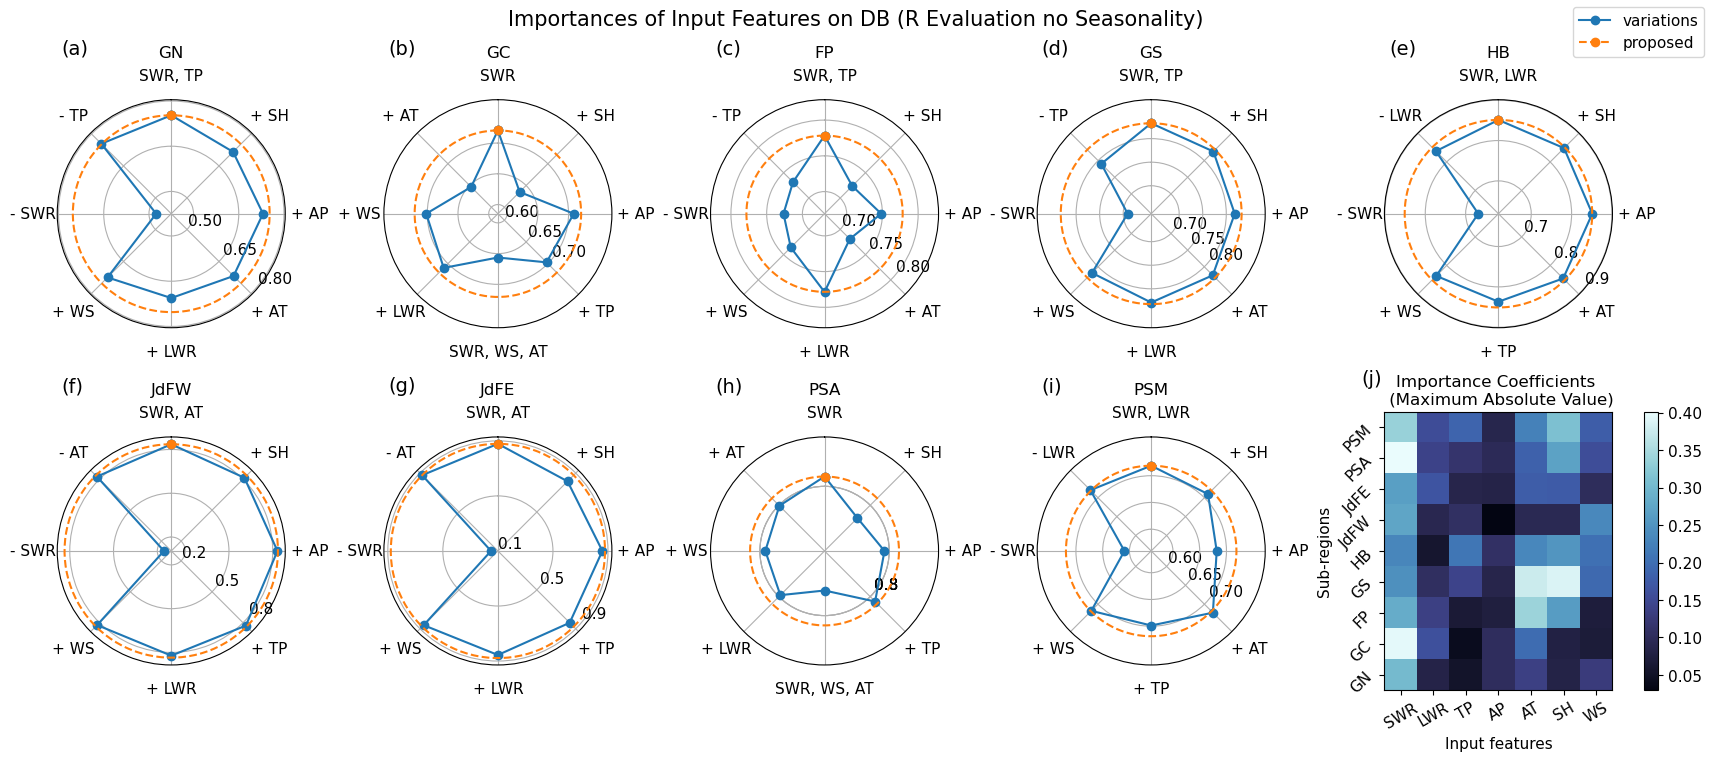

In [7]:
if 'Production' in name: 
    figure_r_pr(names, boxnames, r_s, r_b, r_importance, name2)

else:
    figure_r_b(names, inputs_names2, boxnames, r_b, coef_max, name2)

## Figure 2 (RMSE Testing)

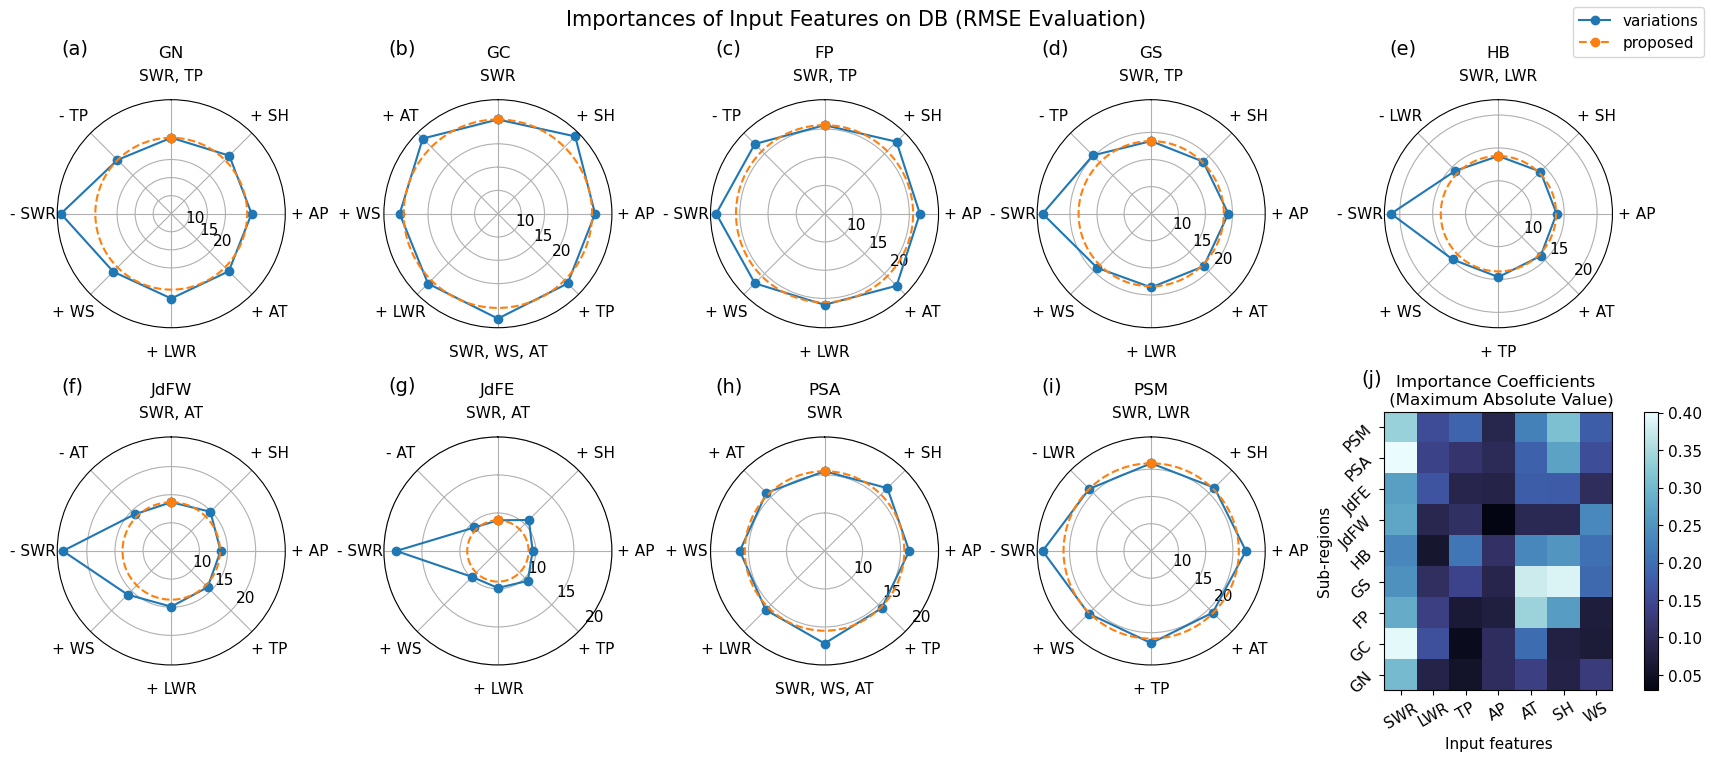

In [8]:
if 'Production' in name: 
    figure_rms_pr(names,boxnames,rms_s,rms_b,rms_importance,name2)

else:
    figure_rms_b(names, inputs_names2, boxnames, rms_b, coef_max, name2)

## Figure 3 (Heatmaps - Biomass)

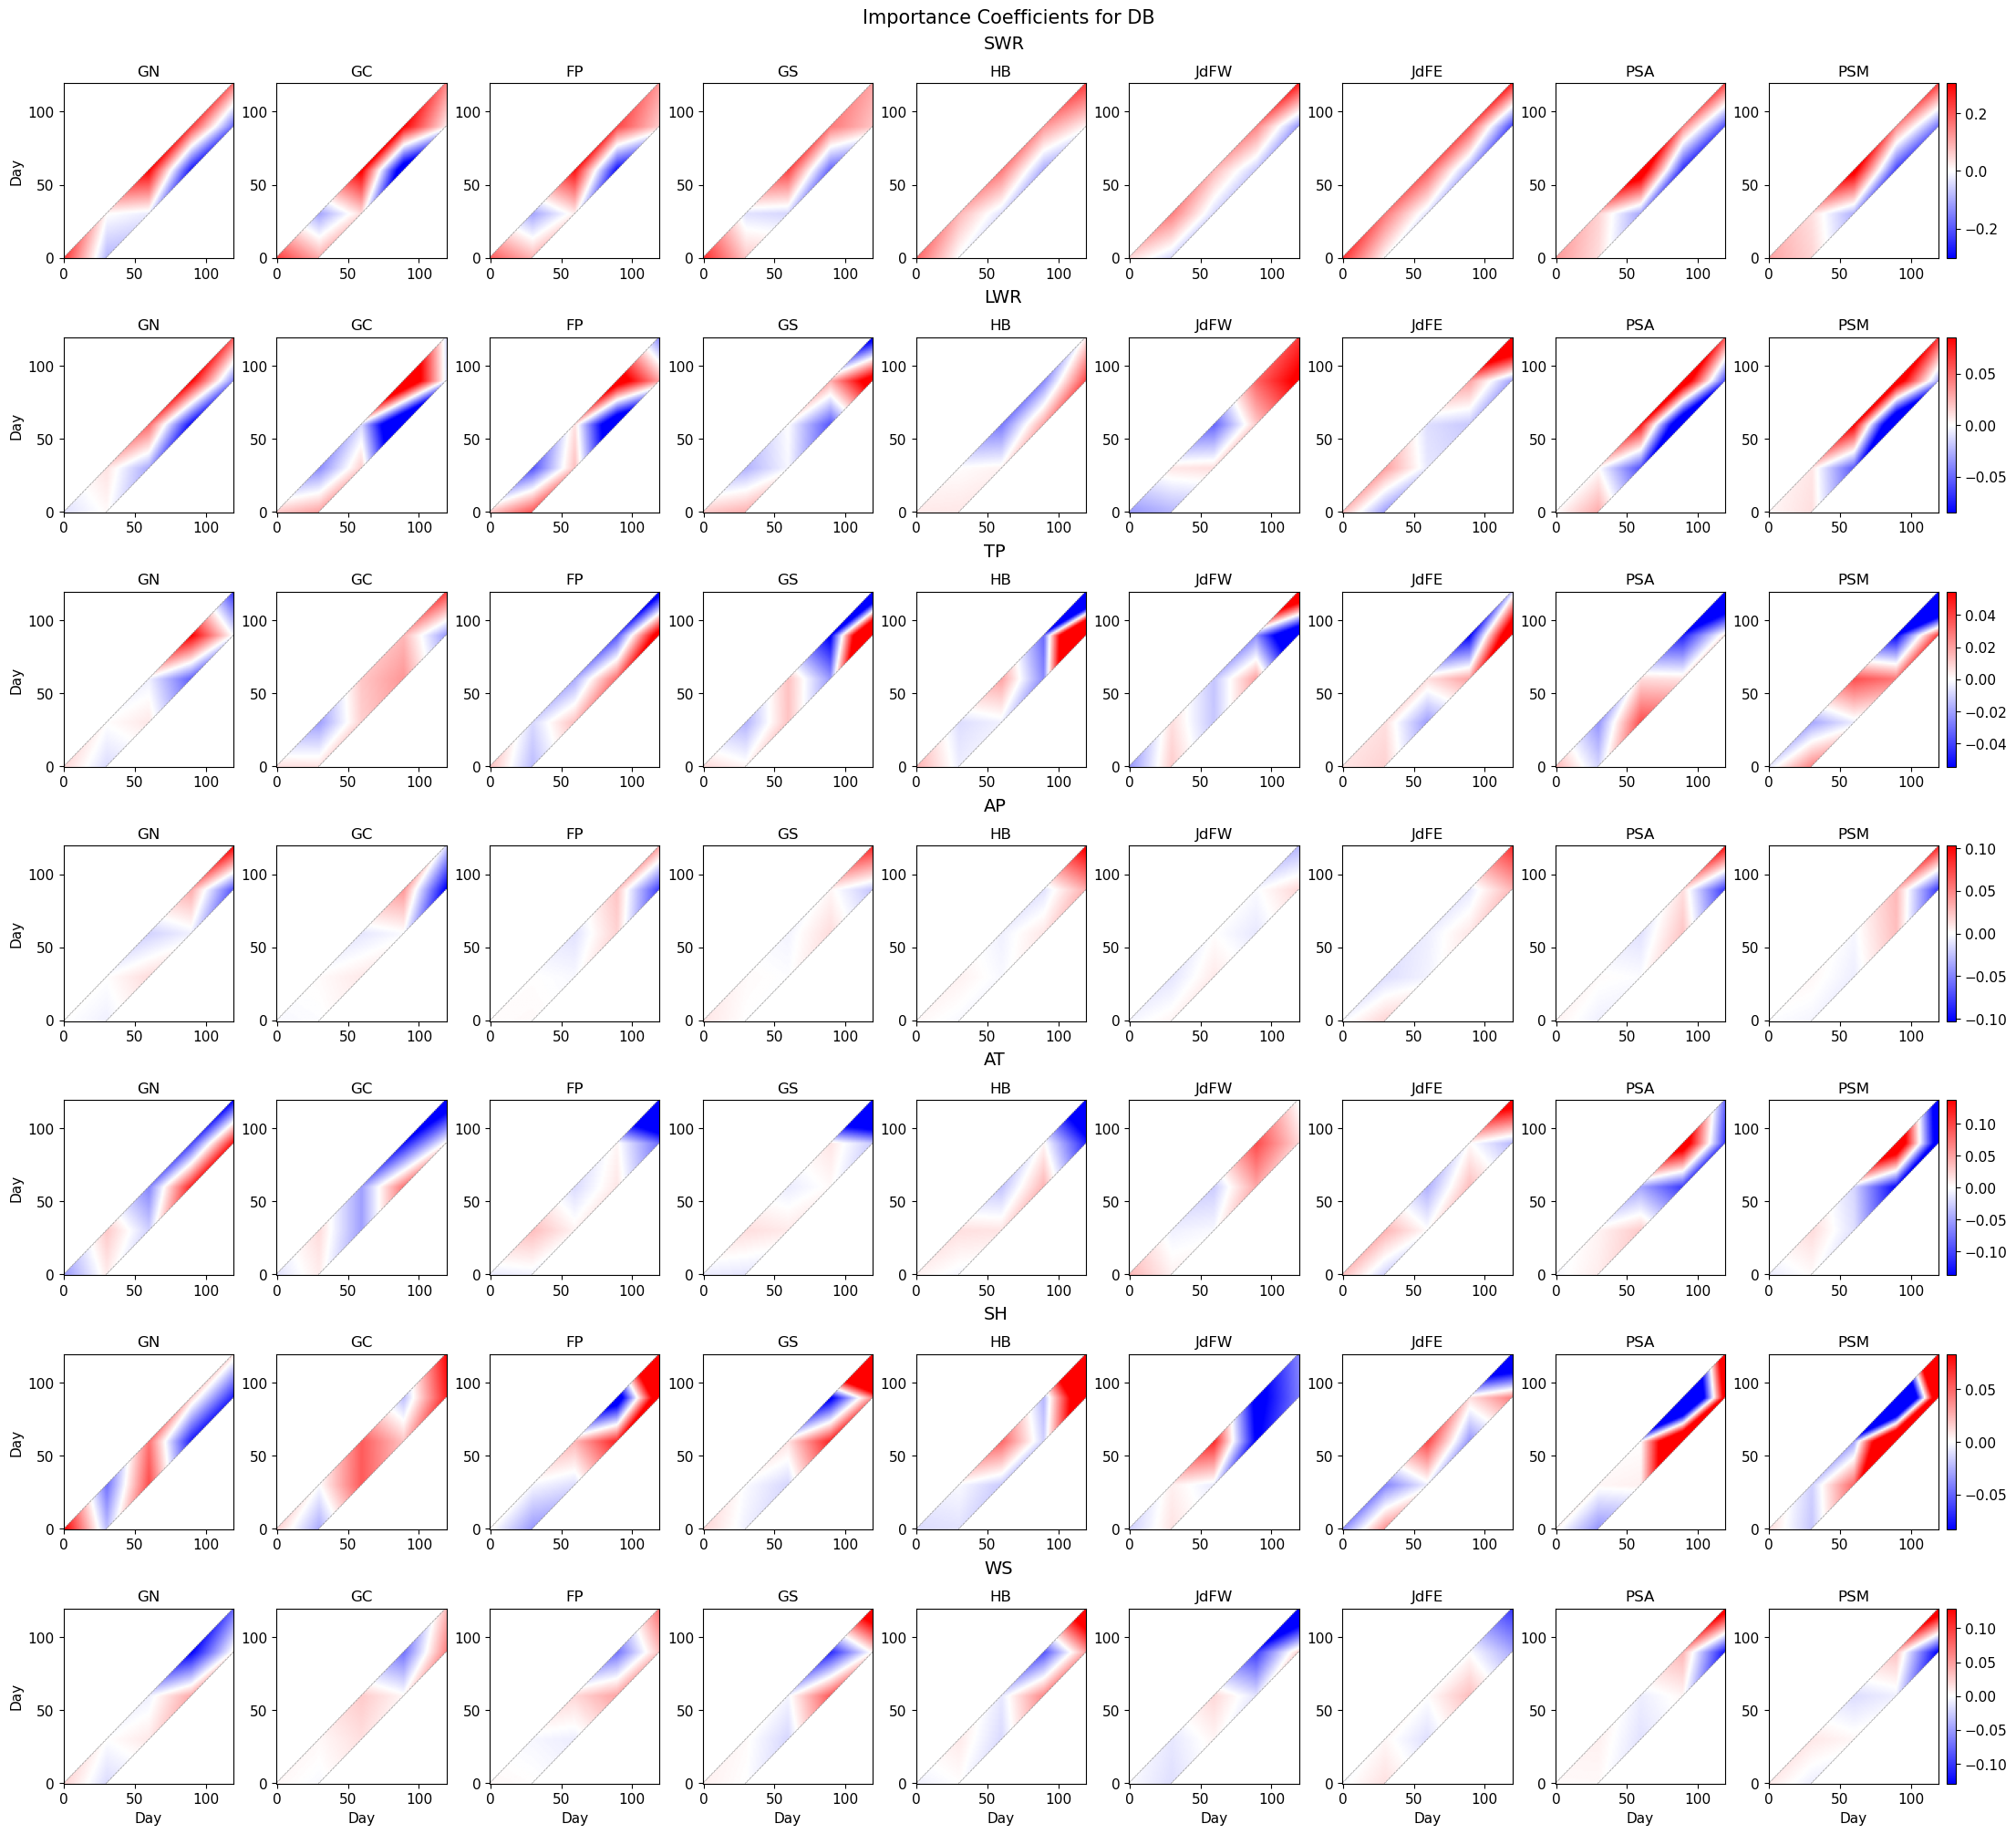

In [9]:
if 'Production' not in name: 

    fig, axs = plt.subplots(len(inputs_names2), len(boxnames), figsize = (22,20), layout='constrained')

    for i in range(0,len(inputs_names2)):
    
        for j in range(0,len(boxnames)):

            temp = regr_all[j].coef_
            coeff = temp.data_matrix
            coeff = np.where(coeff==0,np.nan,coeff)

            if j==0: # first box for this input feature

                vmin = np.nanmin(coeff[0,:,:,i])
                vmax = np.nanmax(coeff[0,:,:,i])
                axs[i,j].set_ylabel('Day', fontsize=11) # day for y axis

            h = axs[i,j].imshow(coeff[0,:,:,i], cmap='bwr',aspect='auto', vmin=-np.maximum(np.abs(vmin),vmax), vmax=np.maximum(np.abs(vmin),vmax))

            axs[i,j].set_ylim(axs[i,j].get_ylim()[::-1])
            axs[i,j].set_yticks((0,50,100))
            axs[i,j].set_title(boxnames[j], fontsize=12)

            if j == len(boxnames)-1: # colorbar only on the last box
                cbar = fig.colorbar(h)
                cbar.ax.tick_params(labelsize=11)

            if i == len(inputs_names2)-1: # day for x axis
                axs[i,j].set_xlabel('Day', fontsize=11)

            axs[i,j].xaxis.set_tick_params(labelsize=11)
            axs[i,j].yaxis.set_tick_params(labelsize=11)

            if j == 4: # input title
                axs[i,j].annotate(inputs_names2[i], (0.4, 1.2), xycoords='axes fraction', fontsize=14)

    fig.suptitle('Importance Coefficients for ' + name2, fontsize=15)
    plt.show()
